In [1]:
import pandas as pd

# Replace 'path_to_file' with the actual path to your CSV file
csv_file_path = "C:\Professional\MS\SHU\Dissertation\Input_data\Income.csv"

# Read the CSV file into a pandas DataFrame, skipping the first row (header)
df = pd.read_csv(csv_file_path, skiprows=1)

In [40]:
# Include the 'Geography' column in the list of columns to extract
desired_columns = ['Geography'] + [col for col in df.columns if col.startswith('Estimate') and ('Percent' not in col) and ('Median' in col and 'dollars' in col)]

# Extract the desired columns
df_extracted = df[desired_columns]

# Verify the columns that were removed are not required in the analysis
removed_columns = list(set(df.columns) - set(df_extracted.columns))
# Reset the index and remove it from the DataFrame
df_extracted = df_extracted.reset_index(drop=True)

# Display the extracted DataFrame
df_extracted

,Geography,Estimate!!Households!!Median income (dollars),Estimate!!Families!!Median income (dollars),Estimate!!Married-couple families!!Median income (dollars),Estimate!!Nonfamily households!!Median income (dollars)
0,860Z200US00601,15292,16283,19060,9386
1,860Z200US00602,18716,23199,26600,11242
2,860Z200US00603,16789,21537,35043,10639
3,860Z200US00606,18835,21044,25455,15849
4,860Z200US00610,21239,25097,28653,12832
...,...,...,...,...,...
33769,860Z200US99923,-,-,-,-
33770,860Z200US99925,70625,79375,95417,23958
33771,860Z200US99926,58229,80625,98333,31250
33772,860Z200US99927,-,-,-,-


In [41]:
print(removed_columns)

['Annotation of Margin of Error!!Nonfamily households!!PERCENT ALLOCATED!!Family income in the past 12 months', 'Annotation of Estimate!!Households!!Total!!$15,000 to $24,999', 'Annotation of Margin of Error!!Married-couple families!!Total!!$25,000 to $34,999', 'Annotation of Estimate!!Married-couple families!!Total!!$35,000 to $49,999', 'Estimate!!Families!!Total', 'Annotation of Margin of Error!!Families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months', 'Estimate!!Households!!Total!!$75,000 to $99,999', 'Estimate!!Nonfamily households!!Total!!$50,000 to $74,999', 'Annotation of Estimate!!Households!!Total!!Less than $10,000', 'Annotation of Margin of Error!!Married-couple families!!PERCENT ALLOCATED!!Family income in the past 12 months', 'Annotation of Margin of Error!!Families!!Total!!$150,000 to $199,999', 'Annotation of Margin of Error!!Married-couple families!!Total!!$100,000 to $149,999', 'Margin of Error!!Families!!Total!!$15,000 to $24,999', 'Estimate!!Households!!P

In [42]:
new_column_names = {
    'Geography': 'Geography',
    'Estimate!!Households!!Median income (dollars)': 'Household Median Income'
}

df_extracted = df_extracted.rename(columns=new_column_names)

In [43]:
df_extracted = df_extracted[['Geography','Household Median Income']]

In [48]:
# Checking for missing values
missing_values = df_extracted.isnull().sum()

print("Missing Values:")
print(missing_values)

Missing Values:
Geography                  0
Household Median Income    0
dtype: int64


In [ ]:
df_extracted['Household Median Income'] = pd.to_numeric(df_extracted['Household Median Income'], errors='coerce')

In [74]:
import numpy as np
numeric_columns = ['Household Median Income' ]
# Function to check if a string is numeric (including handling scientific notation)
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Function to clean and convert values to numeric format
def clean_and_convert(value):
    value = str(value).replace(',', '').replace('+', '').replace('-', '')  # Remove , + and - characters
    try:
        return float(value)  # Convert to float
    except ValueError:
        return np.nan  # If not a valid numeric value, return NaN

# Loop through each numeric column and check for non-numeric characters
for column in numeric_columns:
    non_numeric_values = df_extracted[column][~df_extracted[column].apply(is_numeric)]
    if len(non_numeric_values) > 0:
        print(f"Column '{column}' has non-numeric values:")
        for value in non_numeric_values:
            non_numeric_chars = ''.join([char for char in str(value) if not is_numeric(char) and char != '.'])
            print(f"Value '{value}' contains non-numeric characters: {non_numeric_chars}")

    # Clean and convert values for the column
    df_extracted[column] = df_extracted[column].apply(clean_and_convert)


,Geography,Household Median Income
0,860Z200US00601,15292.0
1,860Z200US00602,18716.0
2,860Z200US00603,16789.0
3,860Z200US00606,18835.0
4,860Z200US00610,21239.0
...,...,...
33769,860Z200US99923,NaN
33770,860Z200US99925,70625.0
33771,860Z200US99926,58229.0
33772,860Z200US99927,NaN


In [85]:
len(df_extracted[df_extracted['Household Median Income'].isna()==True])

3178

In [88]:
df_extracted['Household Median Income'] = df_extracted['Household Median Income'].fillna(df_extracted['Household Median Income'].mean())

In [89]:
len(df_extracted[df_extracted['Household Median Income'].isna()==True])

0

In [90]:
df_extracted.to_csv("C:\professional\ms\shu\dissertation\Output_data\dem\income_cleaned.csv",index=False)

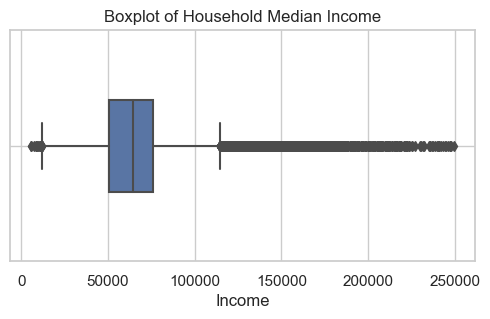

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_extracted contains your data
plt.figure(figsize=(6,3))
sns.boxplot(x=df_extracted['Household Median Income'], width=0.4, orient='h')
plt.title('Boxplot of Household Median Income')
plt.xlabel('Income')
plt.grid(True)
plt.show()


C:\Users\nikhi\AppData\Local\Temp\ipykernel_26124\4204933690.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(income_values, shade=True)


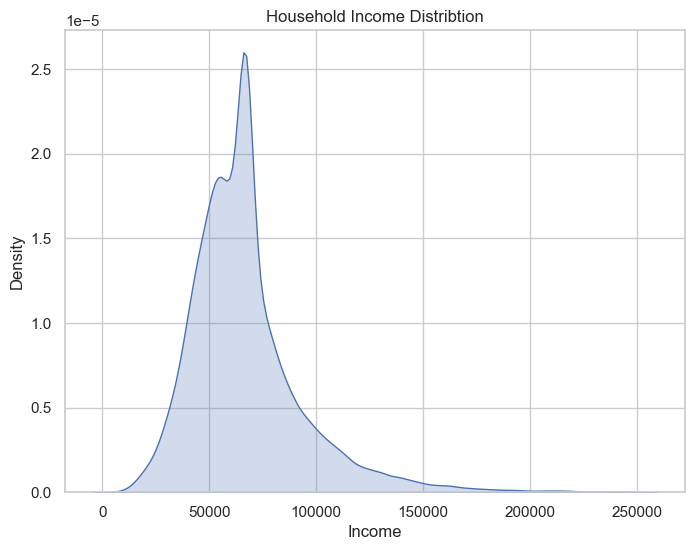

In [102]:
income_values = df_extracted['Household Median Income']

plt.figure(figsize=(8, 6))
sns.kdeplot(income_values, shade=True)
plt.title('Household Income Distribtion')
plt.xlabel('Income')
plt.ylabel('Density')
plt.grid(True)
plt.show()